<a href="https://colab.research.google.com/github/ikinikar/ORL_Code/blob/main/ORL_Actual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports/Set-Up
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Set-Ups of What I will be doing a neural network for
image_names = [] #Input names
images = [] #Greyscale arrays of inputs
person_numbers = [] #Outputs
for dirname, _, filenames in os.walk('drive/MyDrive/kaggle/input/'):
  for filename in filenames:
      image_names.append(os.path.join(dirname, filename))
      Dissected_Name_One = filename.split('_')
      Dissected_Name_Two = Dissected_Name_One[1].split('.')
      person_numbers.append(Dissected_Name_Two[0])



for i in range(len(image_names)):
  a = io.imread(image_names[i], as_gray = True)
  images.append(a)

images_array = np.array(images)
images_array = np.expand_dims(images_array, -1)
print(images_array.shape)

people_array = np.array(person_numbers)
print(people_array.shape)

(410, 80, 70, 1)
(410,)


In [4]:

#sorted_arr = []
#persons_arr = []
#x_train = []
#y_train = []

#for p in range(0, 10):
 # temp_arr = []
 # tarr_two = []
 # for w in range(len(person_numbers)):
  #    temp_arr.append(images[w])
   #   tarr_two.append(w)
 # sorted_arr.append(temp_arr)
 # persons_arr.append(tarr_two)
#print(sorted_arr)
#sorted_array = np.array(sorted_arr)
#print(sorted.shape)
#TO DO: CREATE PSEUDO RANDOM X AND Y DATASETS
#Training set set-up
#train_count = 0
#for x in range(len(sorted_arr)):
  #rand_list = random.sample(sorted_arr[x], 5)

  #for y in rand_list:
  #  train.append(sorted_arr[x][y])
  #  y_train.append()
 # for y in rand_list:
   # sorted_arr[x].pop(y)


#TO DO: CREATE NEW IMAGES W IMAGE DISTORTION

#sorted_array = np.array(sorted_arr)
#print(sorted_array.shape)

In [5]:
#Set-Up of Training and Testing Data (Going to start with 50-50 split (roughly) but will modify as necessary)

x, x_test, y, y_test = train_test_split(images_array, people_array, test_size = 11/41, shuffle = True) #Correct to 75-25 or 80-20 split -- done
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 10/30, shuffle = True)

In [6]:
nb_classes = 42 # number of unique people + 1

# One-hot encoding/re-sizing
Y_train = to_categorical(y_train, nb_classes)
Y_val = to_categorical(y_val, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

print("Y_train shape", np.array(Y_train).shape)
print("Y_val shape", np.array(Y_val).shape)
print("Y_test shape", np.array(Y_test).shape)

Y_train shape (200, 42)
Y_val shape (100, 42)
Y_test shape (110, 42)


In [7]:
model = models.Sequential([
         layers.Conv2D(16, (3,3), activation = 'relu', input_shape= (80, 70, 1)),
         layers.MaxPooling2D(2,2),
         layers.Conv2D(32, (3,3), activation = 'relu'),
         layers.MaxPooling2D(2,2),
         layers.Conv2D(64, (3,3), activation = 'relu'),
         layers.MaxPooling2D(2,2),
         layers.Flatten(),
         layers.Dense(1024, activation = 'relu'),
         layers.Dense(42, activation = 'softmax')
])

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, Y_train, batch_size=56, epochs=100, validation_data = (x_val, Y_val)) #Fix validation data and use model.evaluate() to do the testing

Epoch 1/100
4/4 [==============================] - 12s 200ms/step - loss: 81.5572 - accuracy: 0.0250 - val_loss: 69.3578 - val_accuracy: 0.0200
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 41.9339 - accuracy: 0.0300 - val_loss: 18.6925 - val_accuracy: 0.0300
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 9.4725 - accuracy: 0.1150 - val_loss: 4.6238 - val_accuracy: 0.1800
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 3.3678 - accuracy: 0.3650 - val_loss: 2.9737 - val_accuracy: 0.2900
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 2.1037 - accuracy: 0.5650 - val_loss: 2.2028 - val_accuracy: 0.4900
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 0.9892 - accuracy: 0.8400 - val_loss: 1.4147 - val_accuracy: 0.6900
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.4053 - accuracy: 0.9450 - val_loss: 1.0274 - val_accuracy: 0.7400
Epoch 8/100
4/

In [9]:
model.evaluate(x_test, Y_test, batch_size = 1)

110/110 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.8909


[0.5645157098770142, 0.8909090757369995]

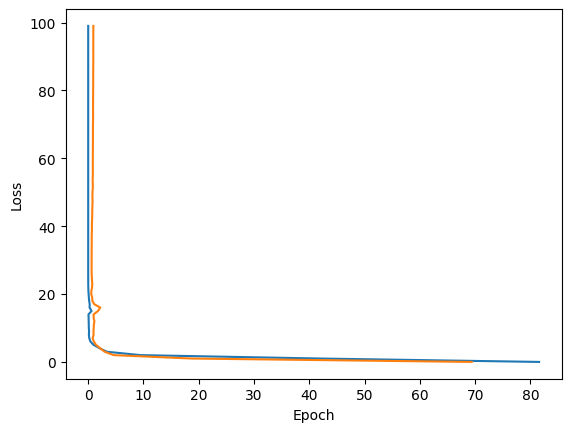

In [10]:
# plot training loss and training accuracy vs epoch number
plt.plot(history.history['loss'], history.epoch)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['val_loss'], history.epoch)
 # Plot loss and val_loss + accuracy and val_accuracy seperately

Text(0, 0.5, 'Accuracy')

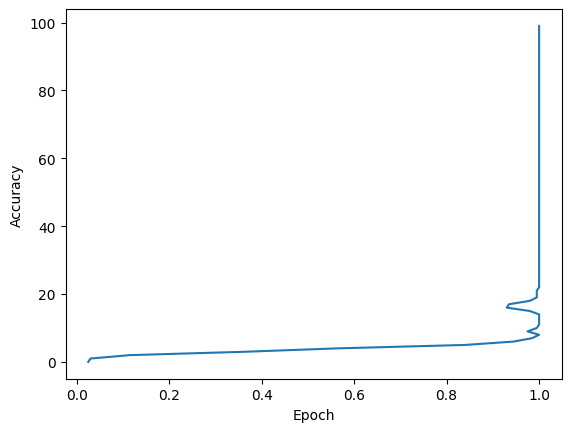

In [11]:
plt.plot(history.history['accuracy'], history.epoch)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")